# Assignment 4 : Simple Linear Regression - Delivary time data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
df.shape

(21, 2)

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [25]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Data Visualization

In [16]:
df_log = np.log(df)

Text(0.5, 1.0, 'Log-Transformed Data')

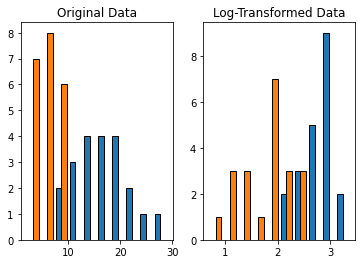

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

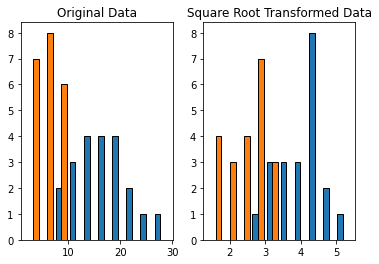

In [23]:
df_sqrt = np.sqrt(df)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_sqrt, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [32]:
y=df['Delivery Time']
x=df['Sorting Time']

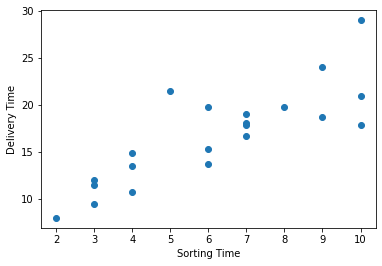

In [33]:
plt.scatter(x,y)
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.show()

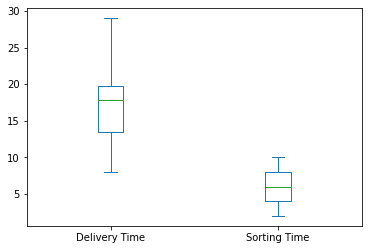

In [8]:
df.plot(kind='box')
plt.show()

In [11]:
import scipy.stats as stats

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Delivery Time Q-Q plot')

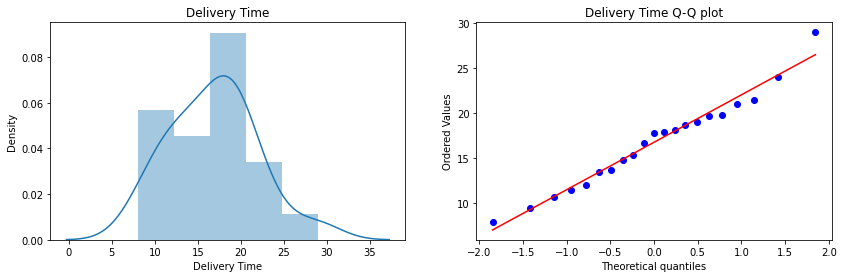

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(122)
stats.probplot(df['Delivery Time'], dist = 'norm', plot=plt)
plt.title ('Delivery Time Q-Q plot')

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sorting Time Q-Q plot')

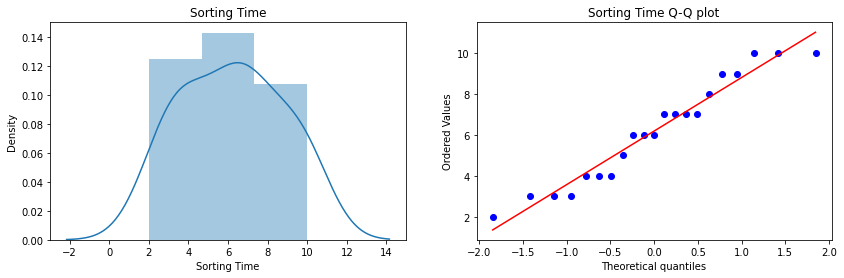

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Sorting Time'])
plt.title('Sorting Time')

plt.subplot(122)
stats.probplot(df['Sorting Time'], dist = 'norm', plot=plt)
plt.title ('Sorting Time Q-Q plot')

In [34]:
y=np.array(y)
x=np.array(x)

In [35]:
X = x.reshape(-1,1)

# Model fitting and Validation

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [37]:
model.coef_

array([1.6490199])

In [38]:
model.intercept_

6.58273397199706

In [39]:
model.predict([[8]])

array([19.77489315])

In [40]:
y_pred = model.predict(X)
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
mean_squared_error(y,y_pred)

7.793311548584063

In [43]:
r2_score(y,y_pred)

0.6822714748417231

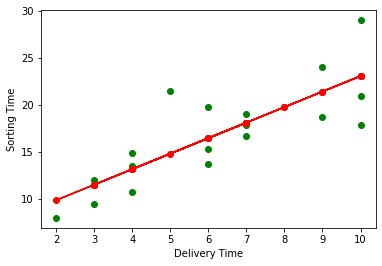

In [44]:
plt.scatter(x,y,color="green")
plt.scatter(x,y_pred,color="red")
plt.plot(x,y_pred,color="red")
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

# Model Prediction

In [46]:
new_data=pd.Series([8,15])
new_data

0     8
1    15
dtype: int64

In [47]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,15


In [48]:
model.predict(data_pred)


array([19.77489315, 31.31803242])